In [1]:
# !pip install alphashape --user
# !pip install descartes

In [1]:
import sys
sys.path.append("../scripts")
from ReST import ReST
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## MELANOMA SAMPLE
df = pd.read_csv("../data/Melanoma/raw.csv", index_col=0)
df.columns = [c.split()[0] for c in df.columns]
xs, ys = [],[]
for ind in df.index.tolist():
    xs.append(int(ind.split('x')[0]))
    ys.append(int(ind.split('x')[1]))
meta_df = pd.DataFrame({'array_col': xs, "array_row": ys}, index = df.index)
gene_df = pd.DataFrame({'gene': df.columns.tolist()}, index=df.columns)

In [3]:
## Data construction, QC, and preprocessing
rd = ReST(counts=df, coordinates=meta_df, gene_df=gene_df)
rd.preprocess(species='Human', hvg_prop=0.8, n_pcs=30)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Before QC: 293 observations and 16148 genes.


Trying to set attribute `.var` of view, copying.


After QC: 287 observations and 11001 genes.


  5%|▍         | 2/41 [00:00<00:02, 19.23it/s]

MIST Data created in 0.87 seconds.


100%|██████████| 41/41 [00:08<00:00,  5.08it/s]


Epsilon 0.460 is selected in 8.26 seconds.


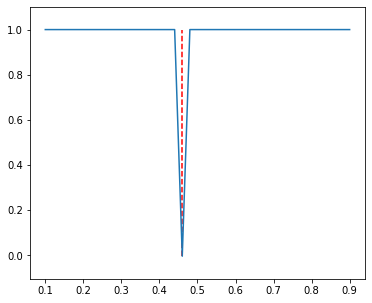

In [4]:
## Region extraction through parameter optimization and graph algorithms
rd.extract_regions(min_sim = 0.1, min_region=20, gap=0.02)

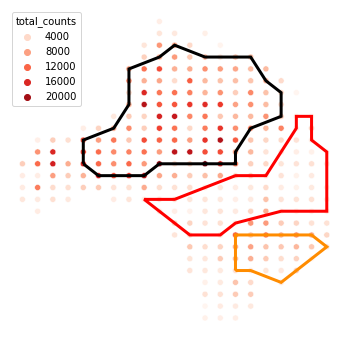

In [5]:
# Plot region boundaries
rd.assign_region_colors(region_colors={'0':'black', '1':'red', '2':'darkorange'})
rd.plot_region_boundaries()

100%|██████████| 3/3 [00:06<00:00,  2.19s/it]


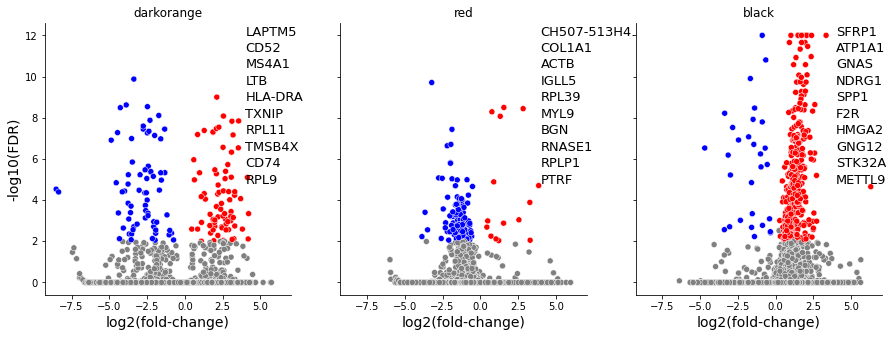

In [6]:
## Functional annotation of the regions
rd.extract_regional_markers(mode='all')
rd.plot_region_volcano()

In [7]:
rd.runGSEA(mode='all', species='Human', gene_sets="GO_Biological_Process_2021")

Running GSEA on mode all for species Human.


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

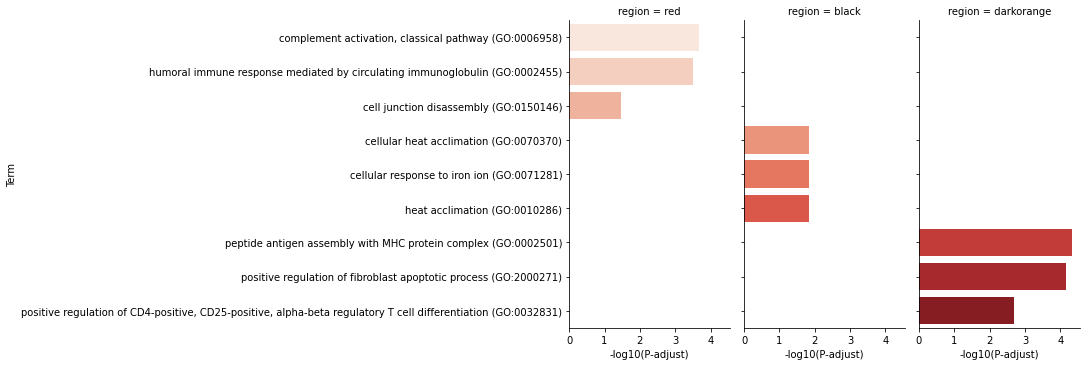

In [8]:
rd.plot_region_enrichment(top=3, flavor='default')